<a href="https://colab.research.google.com/github/HemantSingh108/Netflix-Movies-And-TV-Shows/blob/main/Netflix_Movies_And_TV_Shows_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  :    Netflix-Movies-And-TV-Shows



## **Project Type**    - Unsupervised ML
## **Contribution**    - Individual
## **Team Member 1 -**  Hemant Singh Dangi 









# **Project Summary -**

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it was Founded on August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations.

This dataset consists of TV SHOWS and MOVIES available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findingS.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement** -


This dataset consists of MOVIES and TV SHOWS available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, ROTTEN TOMATOES can also provide many interesting findings.

# **AIM** -

OBJECTIVE is to conduct an Exploratory Data Analysis(EDA) to understand what content is available in different countries and if NETFLIX has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

## **Dataset Description -**

**1**. **show_id** :  Unique ID for every Movie / Tv Show

**2. type** : Identifier - A Movie or TV Show

**3. title** : Title of the Movie / Tv Show

**4. director** : Director of the Movie / TV SHOW

**5. cast** : Actors involved in the movie / TV show

**6. country :** Country where the movie / TV show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / TV show

**9. rating :** TV Rating of the movie / TV show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

12. description:  The Summary 

**Business Objective -**

- Exploratory Data Analysis.

- Understanding what type content is available in different countries.

- has Netflix increasingly focusing on TV rather than movies in recent years.

- Clustering similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries


In [91]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


from numpy import math

import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt


from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [92]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
NetFlix = pd.read_csv('/content/drive/MyDrive/Projects/NETFLIX_MOVIES_AND_TV _SHOWS_CLUSTERING/NETFLIX_MOVIES_AND_TV _SHOWS_CLUSTERING.csv')

### Dataset First View

In [94]:
# Dataset First Look

In [95]:
NetFlix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [96]:
NetFlix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [97]:
# Dataset Rows & Columns count
NetFlix.shape

(7787, 12)

### Dataset Information

In [98]:
# Dataset Info
NetFlix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [99]:
# Dataset Duplicate Value Count
NetFlix.duplicated().sum()

0

#### Missing Values/Null Values

In [100]:
# Missing Values/Null Values Count
NetFlix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [101]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [102]:
# Dataset Columns
NetFlix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [103]:
# Dataset Describe
NetFlix.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 



```
# This is formatted as code
```



### Check Unique Values for each variable.

In [104]:
# Check Unique Values for each variable.
NetFlix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [105]:
# Write your code to make your dataset analysis ready.
NetFlix.isnull().sum().sum()


3631

In [106]:


NetFlix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [107]:
#Total null values count
NetFlix.isnull().sum().sum()

3631

In [108]:
NetFlix[['director','cast','country']] = NetFlix[['director','cast','country']].fillna('Unknown')
NetFlix['rating'] = NetFlix['rating'].fillna(NetFlix['rating'].mode()[0])
NetFlix.dropna(axis= 0 ,inplace = True)


In [109]:
NetFlix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [110]:
NetFlix.shape

(7777, 12)

### What all manipulations have you done and insights you found?

Answer Here.

In [111]:
NetFlix.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [112]:
NetFlix.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [113]:
# Choosing the PRIMARY COUNTRY and PRIMARY GENRE to simplify our analysis
NetFlix['country'] = NetFlix['country'].apply(lambda y: y.split(',')[0])
NetFlix['listed_in'] = NetFlix['listed_in'].apply(lambda y:y.split(',')[0])

In [114]:
NetFlix.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [115]:
NetFlix.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [116]:
NetFlix['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7777, dtype: object

In [117]:
# Splitting the 'duration' column, and changing the datatype to integer for simplifying the calculation.
NetFlix['duration'] = NetFlix['duration'].apply(lambda z : int (z.split()[0]))

In [118]:
NetFlix['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

In [119]:
# NUMBER of seasons for 'TV shows' are :
NetFlix[NetFlix['type']=='TV Show'].duration.value_counts()


1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [120]:
# Length of Movie in minutes :
NetFlix[NetFlix['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [121]:
# TYPECASTING 'date_added' from string to datetime :

NetFlix['date_added'] = pd.to_datetime(NetFlix['date_added'])

In [122]:
NetFlix['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]

In [123]:
NetFlix['date_added'] = pd.to_datetime(NetFlix['date_added'],errors = 'coerce')

In [124]:
NetFlix['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]

In [125]:
# FIRST and LAST date on which the show was added on Netflix :
NetFlix['date_added'].min(),NetFlix['date_added'].max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [126]:

NetFlix['month_added'] = NetFlix['date_added'].dt.month
NetFlix['year_added'] = NetFlix['date_added'].dt.year
NetFlix.drop('date_added', axis=1, inplace=True)

In [127]:
NetFlix.shape

(7777, 13)

In [128]:
NetFlix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 850.6+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'MOVIES and TV SHOWS in the DATASET')

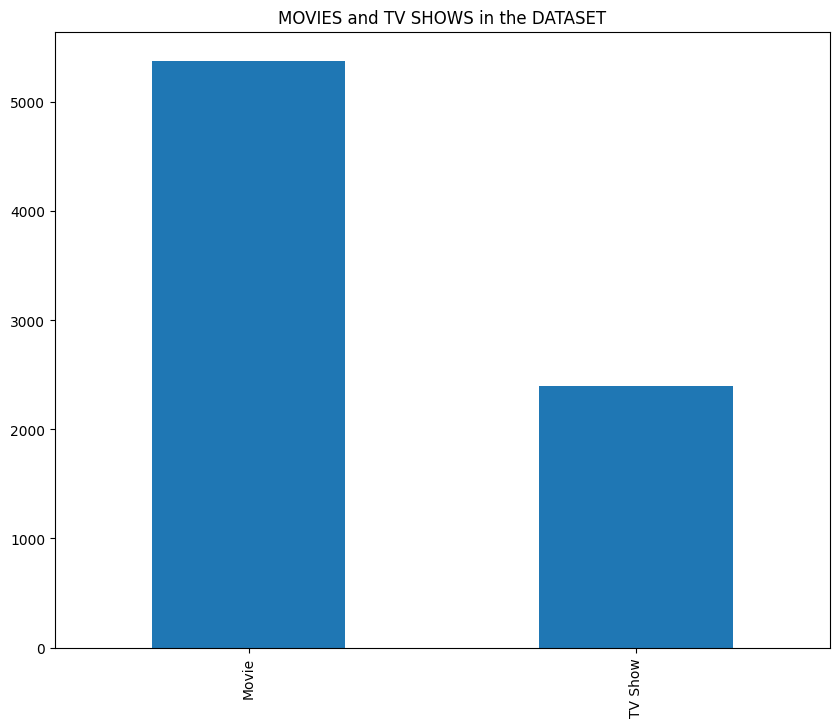

In [129]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
NetFlix['type'].value_counts().plot(kind='bar')
plt.title('MOVIES and TV SHOWS in the DATASET')


- A PIE CHART is a way of summarizing a set of nominal data or displaying the different values of a given variable ,sometimes it is called as a circle chart

 - In this pie plot there are more MOVIES 69.14% than TV SHOWS 30.86% 

#### Chart - 2

Text(0.5, 1.0, 'Top 10 DIRECTORS by number of shows DIRECTED')

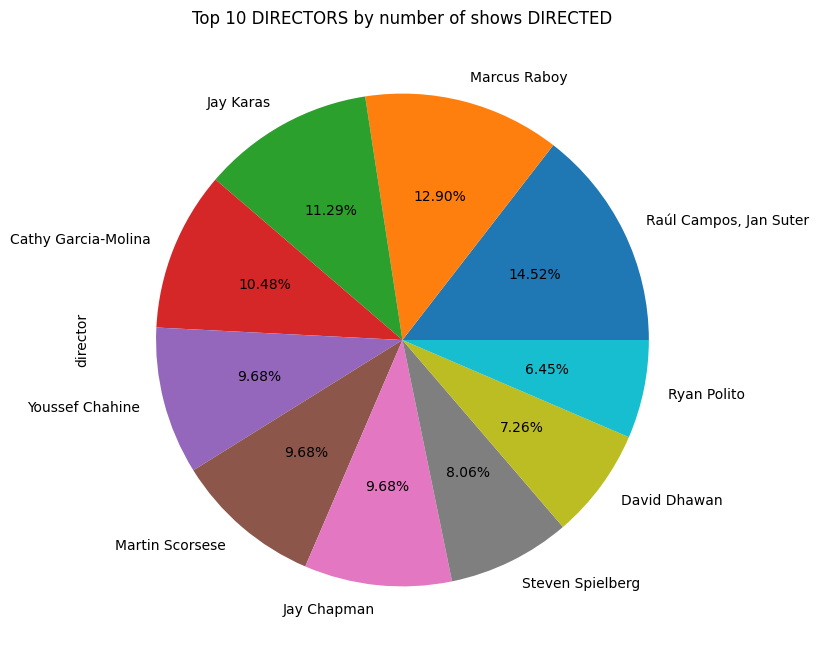

In [130]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
NetFlix[~(NetFlix['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='pie',autopct='%1.2f%%')
plt.title('Top 10 DIRECTORS by number of shows DIRECTED')

- BAR PLOT shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**In this Bar plot, Top 10 directors by number of shows directed are shown.**

 - Raul Campos jan Suter is the top 1 director.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: >

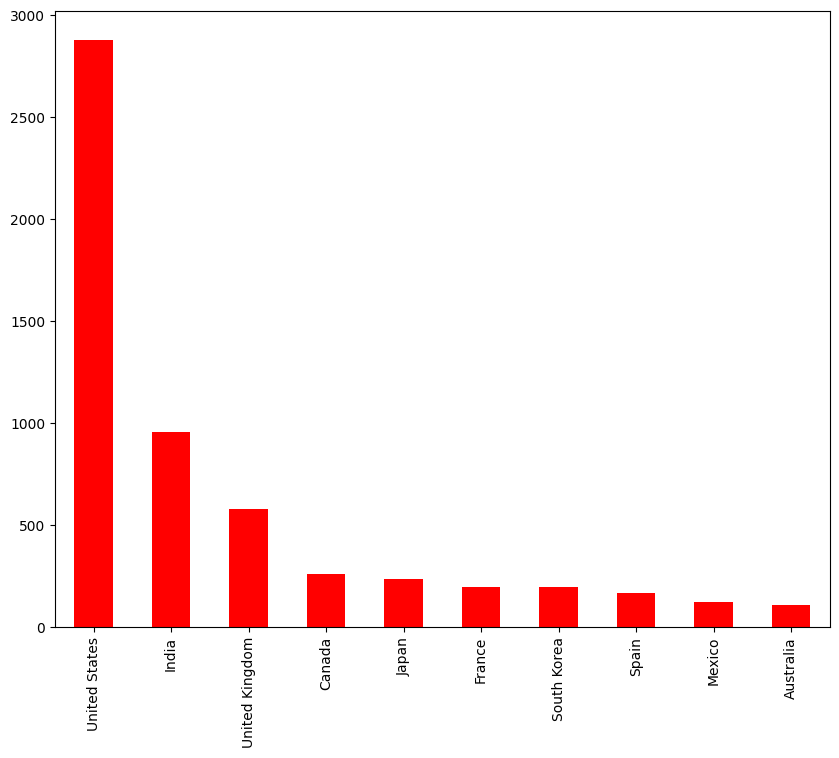

In [131]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
NetFlix[~(NetFlix['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar',color = 'red')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='release_year', ylabel='Count'>

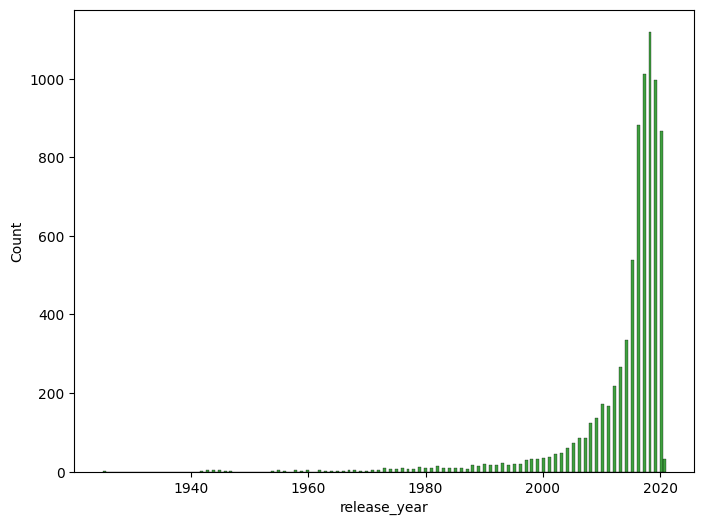

In [132]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
sns.histplot(NetFlix['release_year'],color='green')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='rating', ylabel='count'>

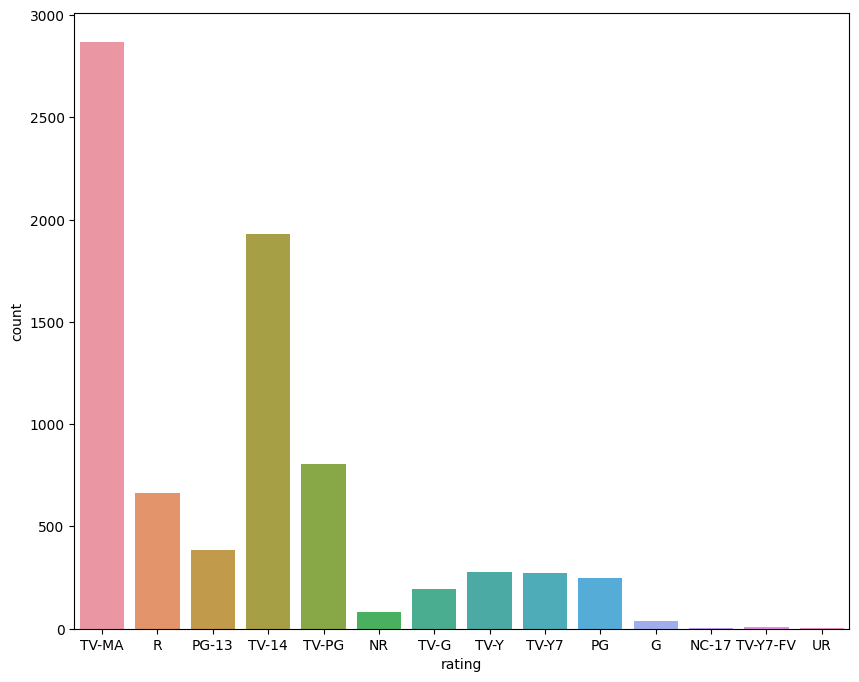

In [133]:
# Chart - 5 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x='rating' ,data=NetFlix)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

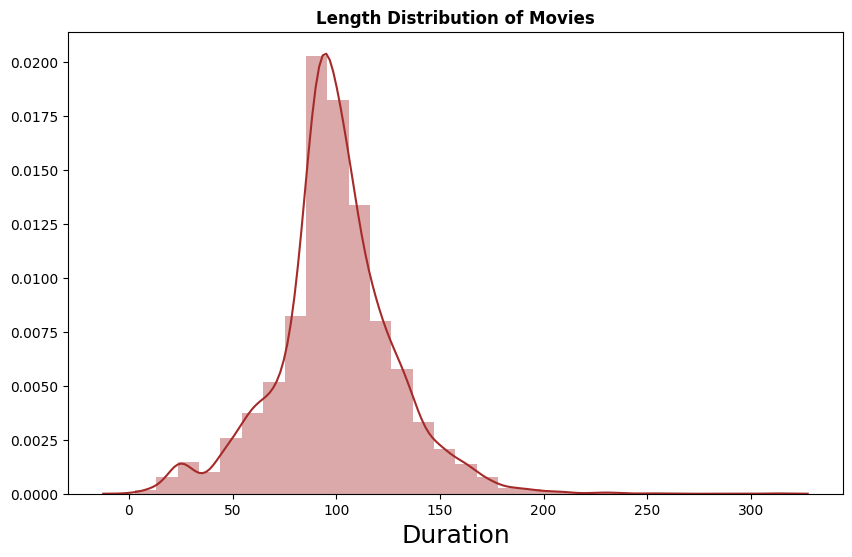

In [134]:
# Chart - 6 visualization code
# Length distribution of movies
NetFlix_Movie = NetFlix[NetFlix['type']=='Movie']

plt.figure(figsize=(10, 6))

sns.distplot(NetFlix_Movie['duration'], bins=30,color='Brown').set(ylabel=None)

plt.title('Length Distribution of Movies', fontsize=12,fontweight="bold")
plt.xlabel('Duration', fontsize=18)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0.5, 1.0, 'Top 10 GENRES')

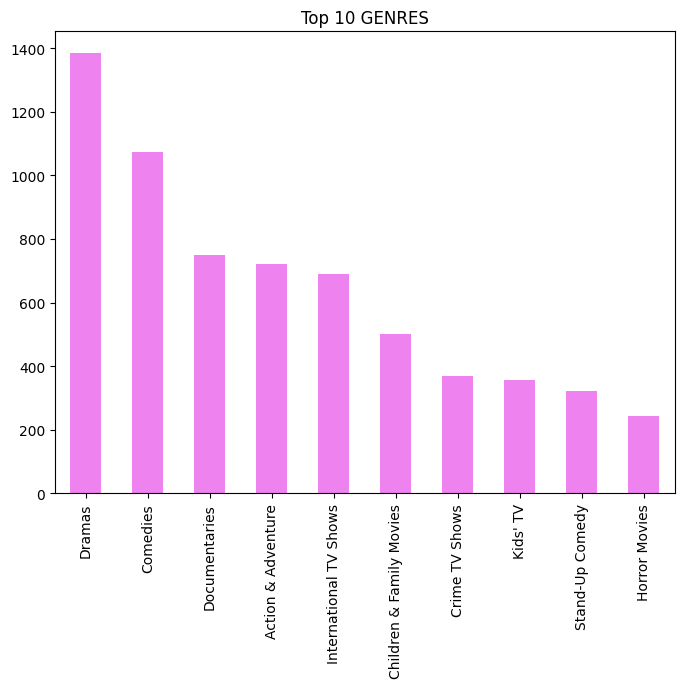

In [135]:
# Chart - 7 visualization code
plt.figure(figsize=(8,6))
NetFlix['listed_in'].value_counts().nlargest(10).plot(kind='bar',color='violet')
plt.title('Top 10 GENRES')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Text(0.5, 1.0, 'SHOWS added each MONTH over the years')

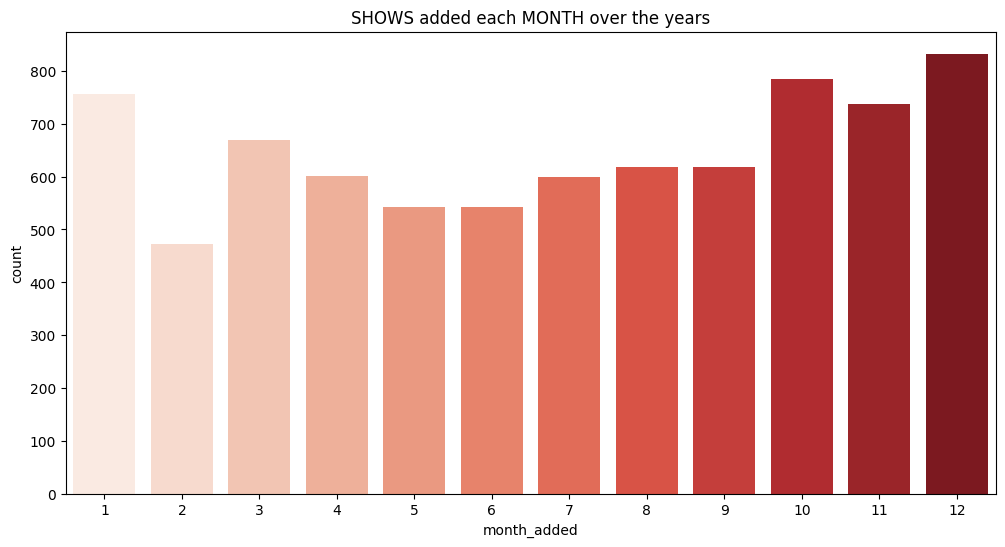

In [136]:
# Chart - 8 visualization code
# NUMBER of SHOWS added on different MONTHS
plt.figure(figsize=(12, 6))
sns.countplot(x = NetFlix['month_added'],palette = "Reds")
plt.title('SHOWS added each MONTH over the years')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 1.0, 'NUMBER of SHOWS added each year')

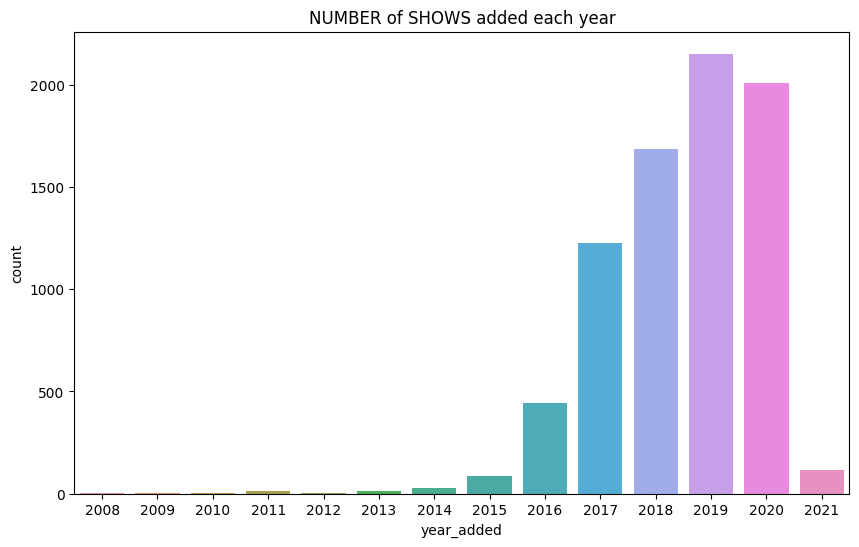

In [137]:
# Chart - 9 visualization code
# NUMBER of SHOWS added over the YEARS
plt.figure(figsize=(10, 6))
sns.countplot(x = NetFlix['year_added'])
plt.title('NUMBER of SHOWS added each year')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Top genres for movies')

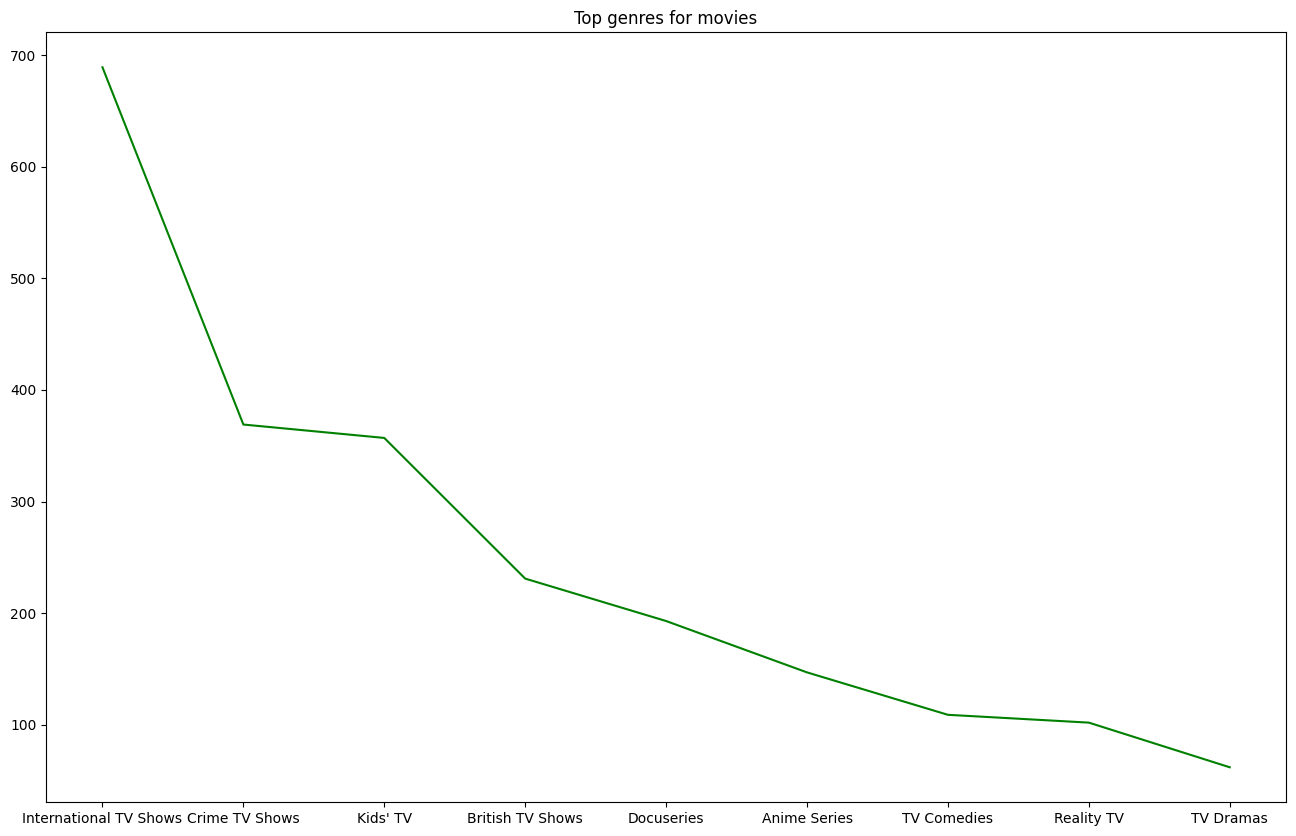

In [198]:
# Chart - 10 visualization code
#TOP GENRE for TV SHOWS
plt.figure(figsize=(16,10))
NetFlix[NetFlix['type']=='TV Show'].listed_in.value_counts().nlargest(9).plot(kind='line',color='green')
plt.title('Top genres for movies')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'TOP 10 GENRE for MOVIES')

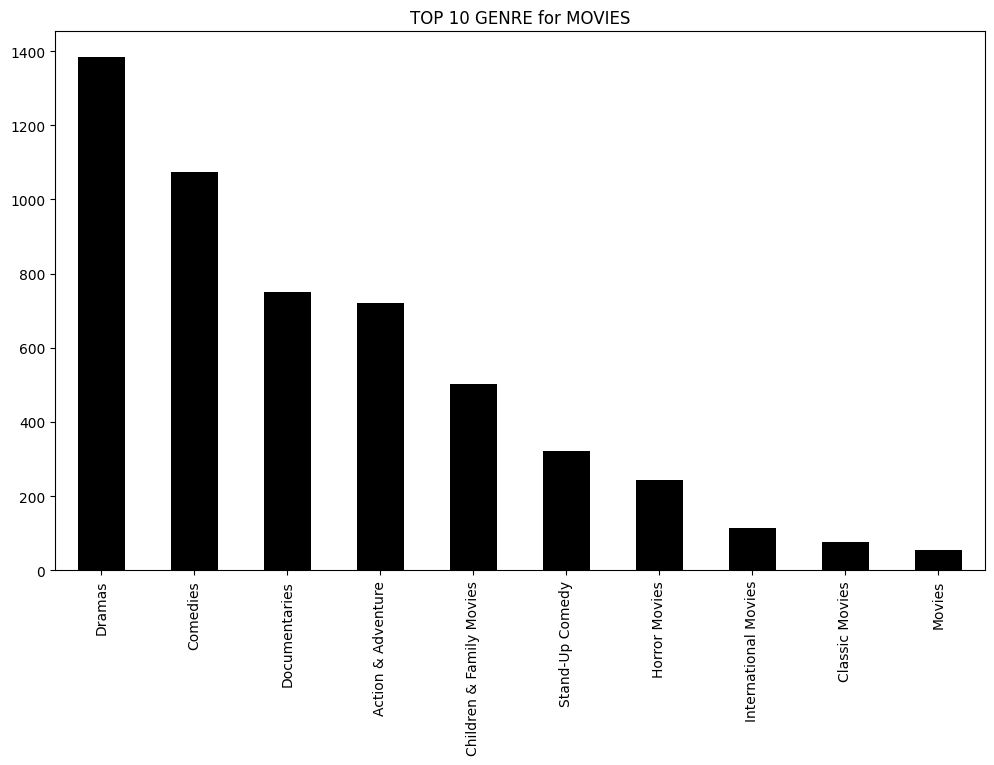

In [201]:
# Chart - 11 visualization code
#TOP 10 GENRE for MOVIES
plt.figure(figsize=(12, 7))
NetFlix[NetFlix['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar',color='black')
plt.title('TOP 10 GENRE for MOVIES')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: >

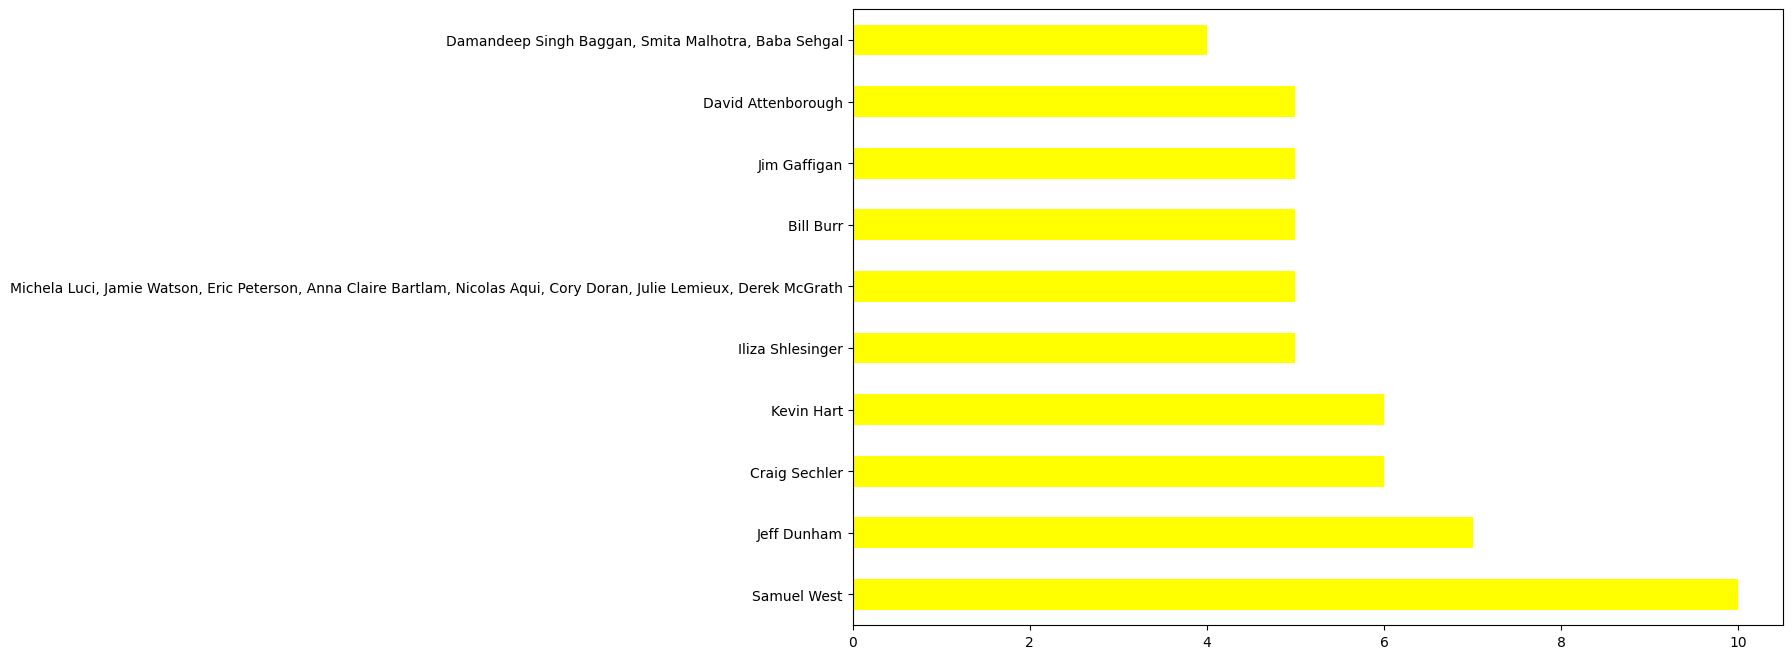

In [140]:
# Chart - 12 visualization code
#TOP ACTORS for MOVIES
plt.figure(figsize=(12, 8))
NetFlix[~(NetFlix['cast']=='Unknown') & (NetFlix ['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh',color='yellow')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<Axes: >

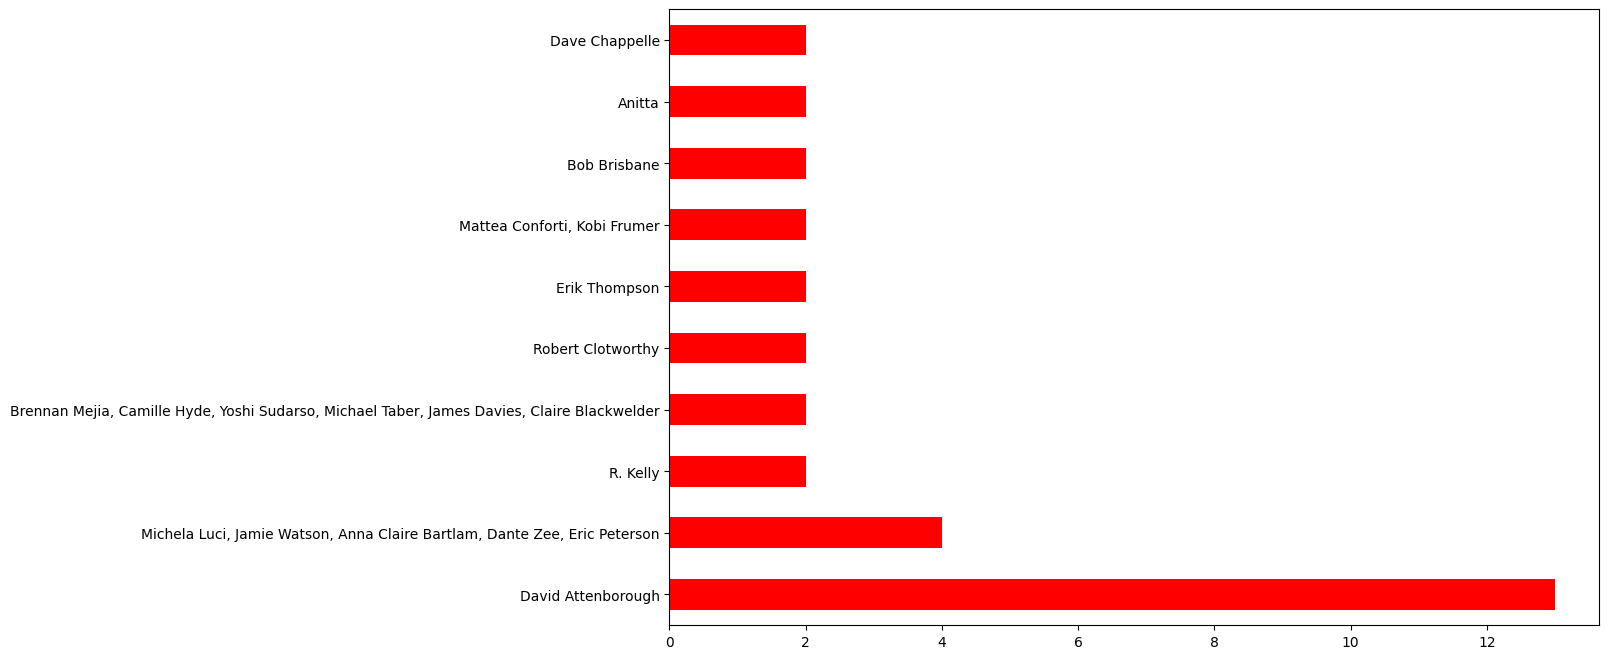

In [141]:
# Chart - 13 visualization code
#TOP ACTORS for TV SHOWS
plt.figure(figsize=(12, 8))
NetFlix[~(NetFlix['cast']=='Unknown') & (NetFlix['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh',color= 'red')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [142]:
# Building a WORDCLOUD for the MOVIE descriptions

COMMENT_WORDS = ''
stopwords = set(STOPWORDS)

# iterate through CSV file

for value in NetFlix.description.values:
    
    # TYPECASTING each VALUE to STRING 
    value = str(value)

    # SPLITING the VALUE
    TOKENS = value.split()


    # CONVERTING each TOKENS into LOWERCASE
    for z in range(len(TOKENS)):
      TOKENS[z] = TOKENS[z].lower()

    COMMENT_WORDS  += " ".join(TOKENS)+" " 


WORDCLOUD = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(COMMENT_WORDS)






          







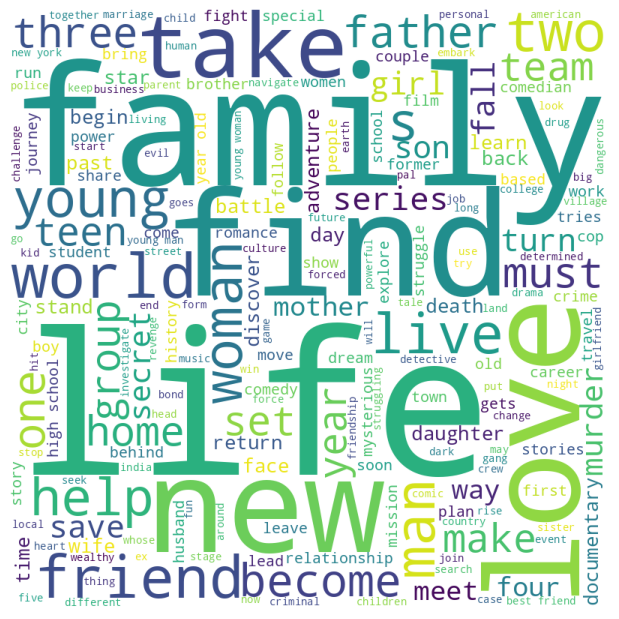

In [143]:
plt.figure(figsize = (12,6), facecolor = None)
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.tight_layout(pad = 0)

#### Chart - 15 - Pair Plot 

Text(0, 0.5, 'Country Name')

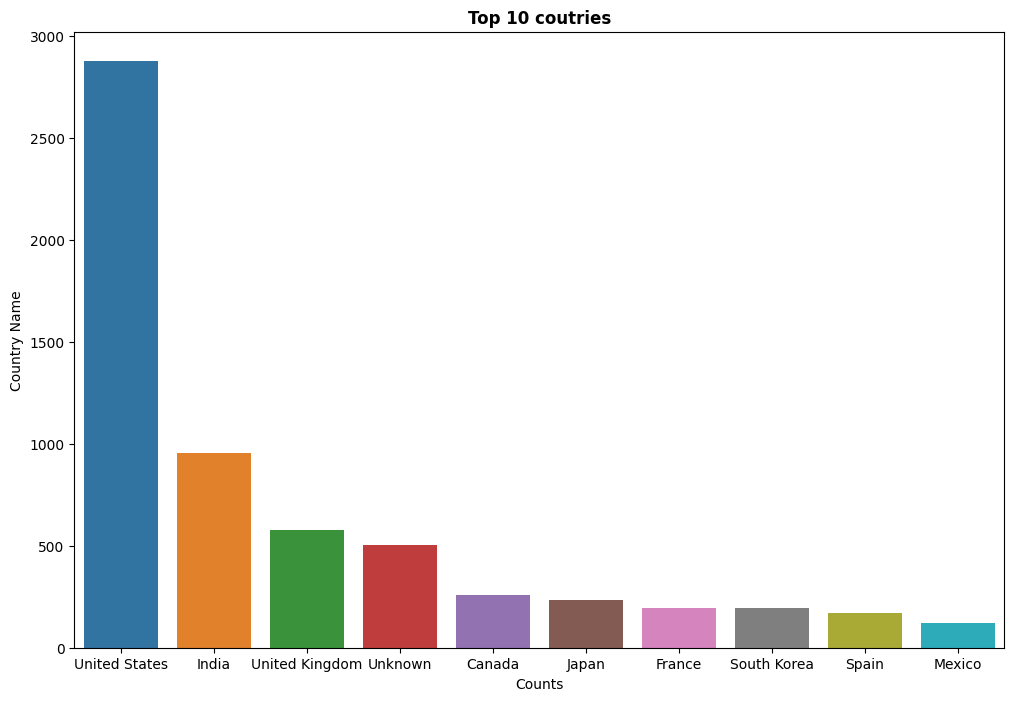

In [144]:
NetFlix['Main_Country']= NetFlix['country'].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(12,8))
ax=sns.countplot(x='Main_Country',lw=2,data=NetFlix,
              order=NetFlix['Main_Country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

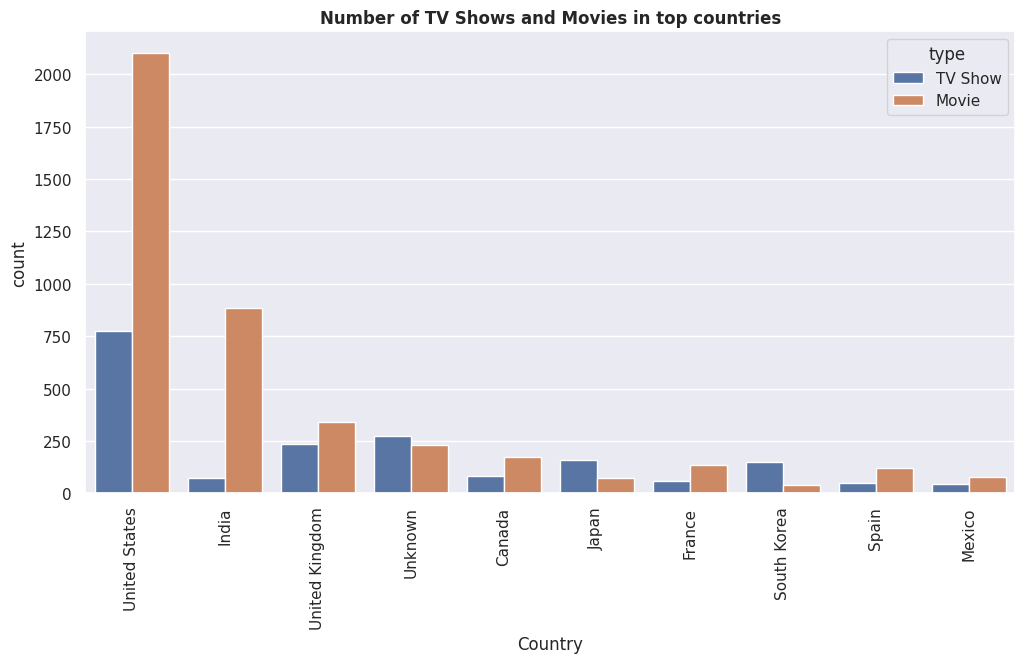

In [202]:

# find Number of TV Shows and Movies content in top countries.

sns.set()
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Main_Country",data= Data,hue= "type",order = Data['Main_Country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top countries",fontweight="bold")
plt.show()
    

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [146]:
## We have successfully completed your EDA !!!

## **Data processing**

In [147]:
Data = NetFlix.copy()

In [148]:
# Handling Outliers & Outlier treatments
Data['Cluster'] = (Data['director'] + ' ' + 
                                Data['cast'] +' ' + 
                                Data['country'] +' ' + 
                                Data['listed_in'] +' ' + 
                                Data['description'])
     

### 3. Categorical Encoding

In [149]:
# Encode your categorical columns
Data['Cluster'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### What all categorical encoding techniques have you used & why did you use those techniques?

## **Removing Punctuations**

> Indented block



In [150]:
# Function for removing Punctuations
def Removing_Punctuation(text):
    '''Function to remove punctuation'''
    Translator = str.maketrans('', '', string.punctuation)
    # It will return the text stripped of Punctuation marks
    return text.translate(Translator)


In [151]:
# Removing Punctuation Marks in our DATA
Data['Cluster'] = Data['Cluster'].apply(Removing_Punctuation)

In [152]:
# Selecting the 100 Clusters for Dataset 
Data['Cluster'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

In [153]:
#Removing  characters:


## **Removing NON-ASCII Characters :**

In [154]:
 # Function for removing NON-ASCII characters :

def Remove_Non_Ascii(word):
    """Function for removing NON-ASCII characters"""
    NEW_WORDS = []
    for w in word:
        New = unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        NEW_WORDS.append(New)
    return NEW_WORDS

In [155]:
# Remove NON-ASCII characters :
Data['Cluster'] = Remove_Non_Ascii(Data['Cluster'])

In [156]:
# Selecting the 100 Clusters for Dataset 
Data['Cluster'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

### **REMOVE STOPWORDS :**

In [157]:
# Extracting the STOPWORDS from nltk library :
import nltk
from nltk.corpus import stopwords
words = stopwords.words('english')
# displaying the stopwords
np.array(words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [158]:
# Function to remove STOPWORDS :
def Remove_STOPWORDS(TEXT):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    TEXT = [w.lower() for w in TEXT.split() if w.lower() not in words]
    # joining the list of words with space separator
    return " ".join(TEXT)
     

In [159]:
# Removing STOPWORDS
Data['Cluster'] = Data['Cluster'].apply(Remove_STOPWORDS)
     

In [160]:
# Selecting the 100 Clusters for Dataset 
Data['Cluster'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

## **Lemmatization** :

In [161]:
# Function to LEMMATIZE the CORPUS:
def Lemmatize_VERBS(word):
    """Lemmatize verbs in list of words"""
    Lemmatizer = WordNetLemmatizer()
    Lemmas = []
    for w in word:
        Lemma = Lemmatizer.lemmatize(w, pos='v')
        Lemmas.append(Lemma)
    return Lemmas

In [162]:
# Lemmatization
Data['Cluster'] = Lemmatize_VERBS(Data['Cluster'])

In [163]:
# Selecting the 100 Clusters for Dataset 
Data['Cluster'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

## **Tokenization** :

In [164]:
# Creating a REFERRENCE VARIABLE for Class TweetTokenizer
Tokenizer = TweetTokenizer()

In [165]:
# TOKENIZATION
Data['Cluster'] = Data['Cluster'].apply(lambda x: Tokenizer.tokenize(x))


In [166]:
# Selecting the 100 Clusters for Dataset 
Data['Cluster'][100]

['rajkumar',
 'hirani',
 'aamir',
 'khan',
 'kareena',
 'kapoor',
 'madhavan',
 'sharman',
 'joshi',
 'omi',
 'vaidya',
 'boman',
 'irani',
 'mona',
 'singh',
 'javed',
 'jaffrey',
 'india',
 'comedies',
 'attending',
 'one',
 'indias',
 'premier',
 'colleges',
 'three',
 'miserable',
 'engineering',
 'students',
 'best',
 'friends',
 'struggle',
 'beat',
 'schools',
 'draconian',
 'system']

## **Text Vectorization** :

In [167]:
# Clustering TOKENS saved in a variable
Clustering_VECTORS = Data['Cluster']


In [168]:
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing


def tokenizer(texts):
  return texts


TFIDF = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
z  = TFIDF.fit_transform(Clustering_VECTORS)


In [169]:
# Dataset ROWS & COLUMNS count
z.shape
     

(7777, 20000)

In [170]:
# CONVERTING z into array form for clustering
Z = z.toarray()

In [171]:
# CHECKING the matrix
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **DIMENSION REDUCTION using PCA**

In [172]:
# Now Using PCA for reducing dimensions
pca = PCA(random_state=50)
pca.fit(Z)
     




PCA(random_state=50)

Text(0, 0.5, 'cumulative explained variance')

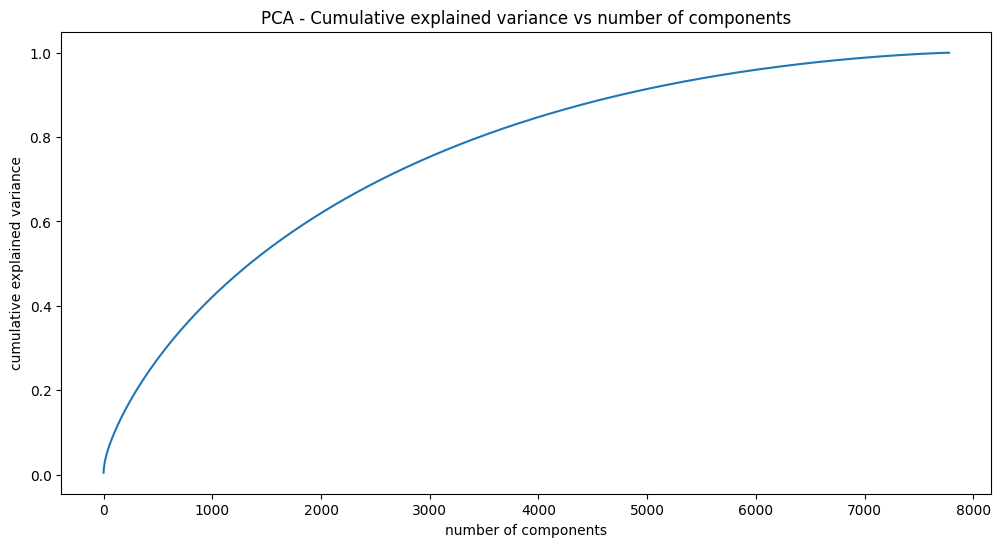

In [173]:
# EXPLAINED VARIANCE for different number of components
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [174]:
# REDUCING DIMENSIONS to 4000 using pca
pca = PCA(n_components=4000,random_state=50)
pca.fit(Z)

PCA(n_components=4000, random_state=50)

In [175]:
# TRANSFORMED features
Z_PCA = pca.transform(Z)
     

In [176]:
# SHAPE of TRANSFORMED vectors
Z_PCA.shape

(7777, 4000)

## **ML Model Implementation** :

## **Starting with UNSUPERVISED MACHINE LEARNING CLUSTERING algorithm.**

##  1. **K-Means Clustering:**

Text(0, 0.5, 'WCSS')

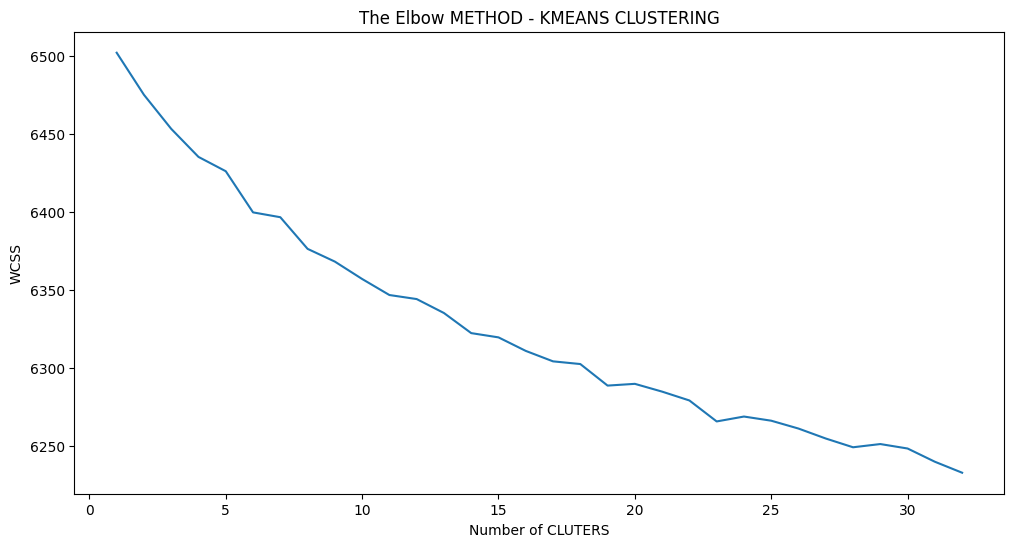

In [177]:
#ELBOW METHOD to find the optimal value of K
WCSS=[]
for i in range(1,33):
  KMEANS = KMeans(n_clusters=i,init='k-means++',random_state=35)
  KMEANS.fit(Z_PCA)
  WCSS_iter = KMEANS.inertia_
  WCSS.append(WCSS_iter)

Number_CLUSTERS = range(1,33)
plt.figure(figsize=(12,6))
plt.plot(Number_CLUSTERS,WCSS)
plt.title('The Elbow METHOD - KMEANS CLUSTERING')
plt.xlabel('Number of CLUTERS')
plt.ylabel('WCSS')

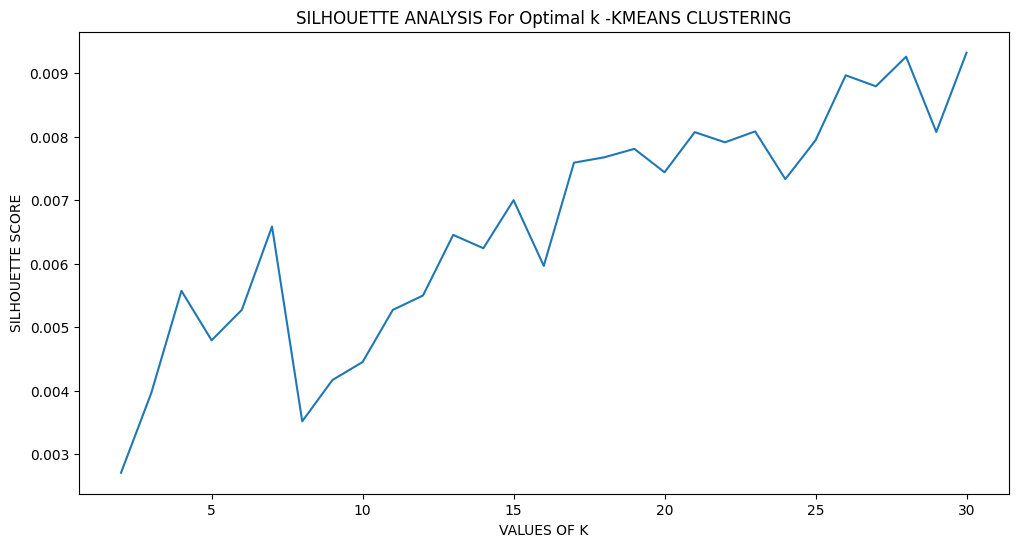

In [178]:
#Plotting the SILHOUETTE SCORE for different number of CLUSTERS

RANGE_N_CLUSTERS = range(2,31)
SILHOUETTE_AVG = []

for NUM_CLUSTERS in RANGE_N_CLUSTERS :
  # initialize kmeans
  KMEANS = KMeans(n_clusters=NUM_CLUSTERS,init='k-means++',random_state=33)
  KMEANS.fit(Z_PCA)
  Cluster_LABELS = KMEANS.labels_
 
  # SILHOUETTE score
  SILHOUETTE_AVG.append(silhouette_score(Z_PCA, Cluster_LABELS))

plt.figure(figsize=(12,6))
plt.plot(RANGE_N_CLUSTERS,SILHOUETTE_AVG)
plt.xlabel('VALUES OF K') 
plt.ylabel('SILHOUETTE SCORE')
plt.title('SILHOUETTE ANALYSIS For Optimal k -KMEANS CLUSTERING')
plt.show()


In [179]:
# Clustering the DATA into 6 CLUSTERS
KMEANS = KMeans(n_clusters=6,init='k-means++',random_state=50)
KMEANS.fit(Z_PCA)



KMeans(n_clusters=6, random_state=50)

In [180]:
# Adding a KMEANS CLUSTER number attribute
Data['KMEANS_CLUSTER'] = KMEANS.labels_


In [181]:
# EVALUATION METRICS - DISTORTION , SILHOUETTE SCORE
KMEANS_DISTORTION = KMEANS.inertia_
KMEANS_SILHOUETTE_SCORE = silhouette_score(Z_PCA,KMEANS.labels_)

print((KMEANS_DISTORTION,KMEANS_SILHOUETTE_SCORE))

(6408.481844923154, 0.0012053440227757434)


In [207]:
# BUILDING a WORDCLOUD for the movie descriptions :

def kmeans_WC(Cluster_number):
  COMMENT_WORDS = ''
  stopwords = set(STOPWORDS)

# iterate through CSV file

  for value in  Data[Data['KMEANS_CLUSTER']=='Cluster_number'].description.values:
    
    # TYPECASTING each VALUE to STRING 
    value = str(value)

    # SPLITING the VALUE
    TOKENS = value.split()


    # CONVERTING each TOKENS into LOWERCASE
    for z in range(len(TOKENS)):
      TOKENS[z] = TOKENS[z].lower()

    COMMENT_WORDS += " ".join(TOKENS)+" " 


  WORDCLOUD = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(COMMENT_WORDS)




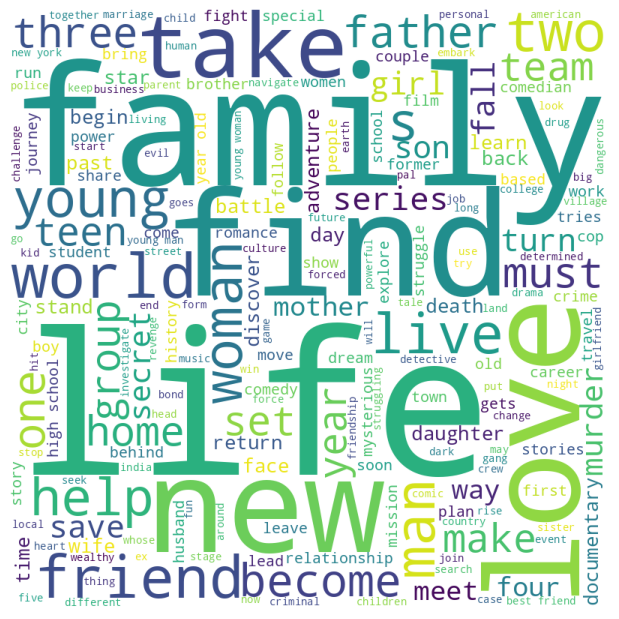

In [208]:
plt.figure(figsize = (12,6), facecolor = None)
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.tight_layout(pad = 0)

### **2. HEIRARCHIAL CLUSTERING**

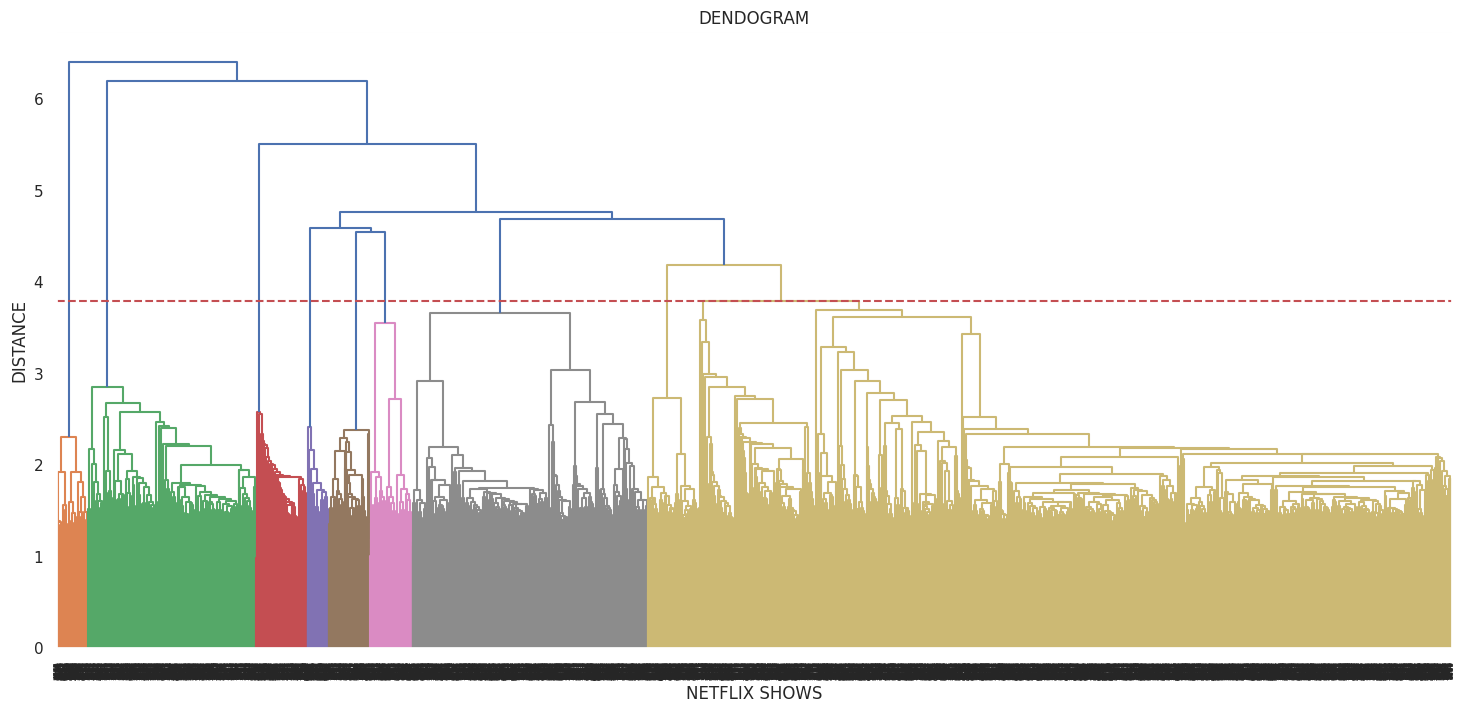

In [209]:
# Building a DENDOGRAM to decide whether on the NUMBER of CLUSTERS
plt.figure(figsize=(18,8))
DEND = shc.dendrogram(shc.linkage(Z_PCA, method='ward'))
plt.title('DENDOGRAM')
plt.xlabel('NETFLIX SHOWS')
plt.ylabel('DISTANCE')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [210]:
# FITTING the HEIRARCHIAL CLUSTERING model
HEIRARCHIAL = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
HEIRARCHIAL.fit_predict(Z_PCA)


array([0, 3, 4, ..., 5, 2, 5])

In [211]:
# Adding HEIRARCHIAL CLUSTER NUMBER attribute 
Data['HEIRARCHIAL_Cluster'] = HEIRARCHIAL.labels_
     
     


In [217]:
# BUILDING a WORDCLOUD for the movie descriptions :

def HEIRARCHIAL_WC(Cluster_number):
  COMMENT_WORDS = ''
  stopwords = set(STOPWORDS)

# iterate through CSV file

  for value in  Data[Data['HEIRARCHIAL_Cluster']=='Cluster_number'].description.values:
    
    # TYPECASTING each VALUE to STRING 
    value = str(value)

    # SPLITING the VALUE
    TOKENS = value.split()


    # CONVERTING each TOKENS into LOWERCASE
    for z in range(len(TOKENS)):
      TOKENS[i] = TOKENS[i].lower()

    COMMENT_WORDS  += " ".join(TOKENS)+" " 


  WORDCLOUD = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(COMMENT_WORDS)

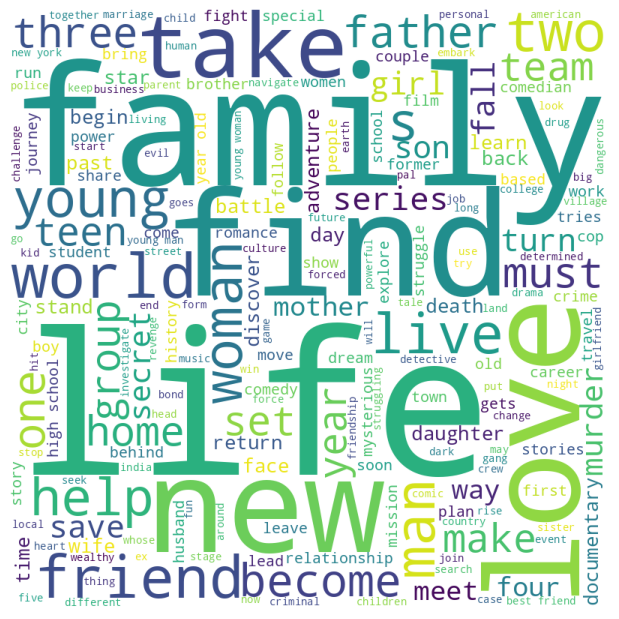

In [218]:
plt.figure(figsize = (12,6), facecolor = None)
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.tight_layout(pad = 0)

## **Using Content based recommender system**

In [219]:
# Changing the INDEX of DATA from show id to show title
Data['show_id'] = Data.index

In [220]:
# Converting TOKENS to STRING
def Convert(lt):
  return ' '.join(lt)

  
Data['Cluster'] = Data['Cluster'].apply(lambda z: Convert(z))

In [221]:
# Setting title of MOVIES/TV_SHOWS as Index
Data.set_index('title',inplace = True)

In [222]:
# COUNT VECTORIZER 
cv = CountVectorizer()
CONVERTED_MATRIX = cv.fit_transform(Data['Cluster'])

In [223]:
# COSINE SIMILARITY
COSINE_SIMILARITY = cosine_similarity(CONVERTED_MATRIX)


In [224]:
# DATASET ROWS AND COLUMNS COUNT
COSINE_SIMILARITY.shape

(7777, 7777)

In [225]:
# Creating a FUNCTION to get 10 RECOMMENDATIONS for a SHOW

INDICES = pd.Series(Data.index)

def DATA__10(title, Cosine_Sim = COSINE_SIMILARITY):
  try:
    RECOMMEND_CONTENT = []   
    idx = INDICES[INDICES == title].index[0]
    series = pd.Series(Cosine_Sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies are
    for i in top10:
      RECOMMEND_CONTENT.append(list(Data.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return RECOMMEND_CONTENT
    
  except:
    return 'INVALID ENTRY'

In [226]:
# Recommendations for '('Kiss Me First')' are :
DATA__10('Kiss Me First')

If you liked 'Kiss Me First', you may also enjoy:



['Mega Food',
 'Churchill’s Secret Agents: The New Recruits',
 'Civilizations',
 'Battlefield Recovery',
 'Inside The Freemasons',
 'Greatest Events of WWII in Colour',
 'Edge of the Universe',
 'The Royal House of Windsor',
 'The Bachelorette',
 'I AM A KILLER']

In [230]:
# Recommendations for '('attlefield Recovery')' are
DATA__10('Battlefield Recovery')

If you liked 'Battlefield Recovery', you may also enjoy:



['Greatest Events of WWII in Colour',
 'Churchill’s Secret Agents: The New Recruits',
 'Civilizations',
 'World War II in Colour',
 'Mega Food',
 'Inside The Freemasons',
 'The Bomb Squad',
 'Edge of the Universe',
 'SuperNature: Wild Flyers',
 'I AM A KILLER']

In [231]:
# Recommendations for 'Peaky Blinders' are
DATA__10('Peaky Blinders')
     

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'I AM A KILLER: RELEASED',
 'Botched Up Bodies',
 'The Hunt',
 'The Murder Detectives',
 'Inside The Freemasons',
 'Happy Valley',
 'Greatest Events of WWII in Colour']

In [232]:
# Recommendations for  'Happy Valley' are
DATA__10('Happy Valley')

If you liked 'Happy Valley', you may also enjoy:



['The Ripper',
 'Inside The Freemasons',
 'Monkey Planet',
 'Edge of the Universe',
 'The Royal House of Windsor',
 'SuperNature: Wild Flyers',
 'Top 10 Secrets and Mysteries',
 'I AM A KILLER',
 'City in the Sky',
 'Murder Maps']

In [233]:
# Recommendations for 'Stranger Things' are :
DATA__10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Drug Lords',
 'Haunted',
 'Living Undocumented',
 'Million Dollar Beach House']

# **Conclusion**

1.) In this project, we worked on a text CLUSTERING problem where in we had to CLASSIFY/GROUP the NETFLIX SHOWS into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

2.) The dataset contained about 7787 records, and 12 attributes. We began by dealing with the dataset's MISSING VALUES and doing EXPLORATORY DATA ANALYSIS (EDA).

3.) It was found that NETFLIX hosts more MOVIES than TV SHOWS on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

4.) Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the PUNCTUATION, and, STOP WORDS. This filtered data is passed through TF - IDF Vectorizer since we are conducting a TEXT-BASED CLUSTERING and the model needs the data to be vectorized in order to predict the desired results.

5.) It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were TOKENIZED, PREPROCESSED, and then vectorized using TFIDF vectorizer.

6.) Through TFIDF Vectorization, we created a total of 20000 attributes. We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000. We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the ELBOW METHOD and SILHOUTTE SCORE analysis.

7.) Then clusters were built using the AGGLOMERATIVE CLUTERING algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

8.) A CONTENT based RECOMMENDER SYSTEM was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.